In [2]:
import numba
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
rng = default_rng()
rvs = stats.uniform().rvs
# rvs = stats.poisson(5, loc=10).rvs
X = random(20, 100, density=0.25, random_state=rng, data_rvs=rvs)
X.A

array([[0.        , 0.        , 0.        , ..., 0.07096323, 0.        ,
        0.        ],
       [0.        , 0.07595765, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.5974677 , ..., 0.82125593, 0.        ,
        0.24565065],
       ...,
       [0.        , 0.4782764 , 0.31220619, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

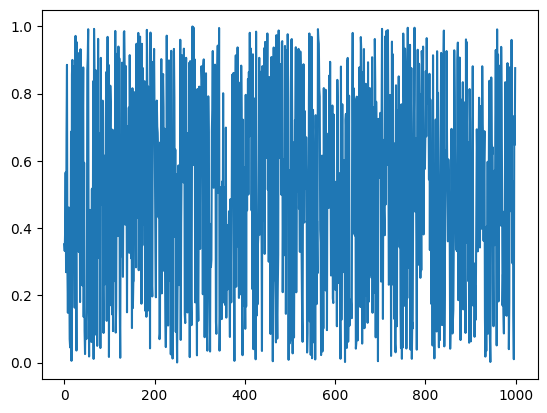

In [87]:
n = 20
p = 50
s = np.random.default_rng().uniform(0,1, n*p)
X = np.reshape(s,(-1, p))
X.shape
df = pd.DataFrame(X)
#  we let r=25

y = np.zeros(n) #initialising y array
for i in range(n):
    yTemp = df.iloc[i,0:25].sum() + np.random.normal(0, 1) #generating y values from a simple linear model with gaussian noise
    y[i] = yTemp

plt.plot(s)

In [6]:
param = dict(sigma1=1, sigma2=1, sigmay=1, p=100)

In [7]:
def multGaussian(X, mu,sigma):
    m = len(mu)
    sigma2 = np.diag(sigma)
    X = X-mu.T
    p = 1/((2*np.pi)**(m/2)*np.linalg.det(sigma2)**(0.5)) * np.exp(-0.5*np.sum(X.dot(np.linalg.pinv(sigma2))*X,axis=1))
    return p

In [ ]:
def diracDelta(x, eps):
    return 1.0/(eps*np.sqrt(2.*np.pi)) * np.exp(-x**2 / (2.*eps**2))
diracDelta = np.vectorize(diracDelta)

diracDelta(y, 10)
# plt.plot(y, diracDelta(y,10))

In [50]:
sigma1 = 1
sigma2 = 0.1
sigmay = 1
niter = 10
gamma = 0.1

In [286]:
len(AAt)

0

In [291]:
p = len(X[1])
n = len(X)
b = p + n
rho = 1
theta = np.array([np.zeros(p)]).T
z = []
# AAt = np.array([np.zeros((p,p))])
AAt = []
Atz = []
for t in range(niter):
    print("Start of %sth iteration" % str(t))
    for i in range(b):
        if i <= p-1:
            e = np.array([np.zeros(p)])
            e[0][i] = 1
            A = e * 1/sigma2
            # AAt[0][i] = np.matmul(A[0].T, A[0])
            AAt.append(np.matmul(A.T, A))
            # print(AAt[i])
            sigsig = sigma2 / sigma1
            w1 = gamma * sigsig / ((gamma * sigsig) + ((1-gamma) * np.exp(-(1-sigsig**2) * np.linalg.norm(np.matmul(A, theta))/2)))
            # print(w1)
            w2 = 1 - w1
            U = np.random.uniform()
            if U > w1:
                mu = (1 - sigsig**2) * np.matmul(A, theta)
                sigmaz = 1 - sigsig**2
                z.append(np.random.normal(mu, sigmaz))
            else:
                z.append(0)
            # print(z[i])
            Atz.append(A.T * z[i])
            
        else:
            X_t = X[i-p].reshape(p, 1)
            A = X_t / sigmay
            AAt.append(np.matmul(A.T, A))
            z.append(y[i-p] / sigmay)
            Atz.append(A.T * z[i])
    print("End of sampling z values")
    sumAAtinv = np.linalg.inv(sum(AAt))
    mu_theta = np.matmul(sumAAtinv, sum(Atz))
    # print(mu_theta)
    sigma_theta = np.linalg.inv(sum(AAt)) * rho**2
    L = np.linalg.cholesky(sigma_theta)
    # print(L)
    print("Start of sampling theta")
    theta_new = mu_theta + L * np.random.normal(0, 1)
    theta = theta_new
    AAt, Atz, z = [], [], []
    print("-------------------------------------------------------")


theta

Start of 0th iteration
End of sampling z values
Start of sampling theta
-------------------------------------------------------
Start of 1th iteration
End of sampling z values
Start of sampling theta
-------------------------------------------------------
Start of 2th iteration
End of sampling z values
Start of sampling theta
-------------------------------------------------------
Start of 3th iteration
End of sampling z values
Start of sampling theta
-------------------------------------------------------
Start of 4th iteration
End of sampling z values
Start of sampling theta
-------------------------------------------------------
Start of 5th iteration
End of sampling z values
Start of sampling theta
-------------------------------------------------------
Start of 6th iteration
End of sampling z values
Start of sampling theta
-------------------------------------------------------
Start of 7th iteration
End of sampling z values
Start of sampling theta
--------------------------------

array([[ 0.09214627,  0.01369836, -0.02094486, ..., -0.0051671 ,
        -0.00883079, -0.00926262],
       [-0.26027822, -0.00999226,  0.11096168, ...,  0.01784503,
        -0.04737863,  0.05044725],
       [ 0.13904725, -0.047679  , -0.0043261 , ..., -0.07799682,
         0.05396029, -0.07575738],
       ...,
       [-0.1848237 ,  0.0651645 ,  0.01464187, ...,  0.12712117,
         0.00398927, -0.1715458 ],
       [-0.02507096, -0.22121521,  0.10187248, ..., -0.08724462,
         0.11687862,  0.18742305],
       [ 0.03629731, -0.03640183, -0.20630236, ...,  0.03297763,
        -0.08071386,  0.10657152]])

In [149]:
X_t = X[i].reshape(p, 1)
A = X_t / sigmay
# print(A)
np.matmul(A, theta)
y[i]
# z[i] = y[i] / sigmay

13.388671926137185

In [185]:
AAt = np.array([np.zeros(20)])
e = np.array([np.zeros(20)])
theta = np.array([np.zeros(20)]).T
z = np.array([np.zeros(20)])
z[0][2]= 2
e[0][i] = 1
# print(e)
A = e * 1/sigma2
# print(A[0])
print(np.matmul(A[0], theta))
# print(A.T * z[0][2])

[0.]


In [ ]:
def splitGibbs(sigma1, sigma2, sigmay, p, iter=1000):
    rho = 1
    theta0 = 0
    for t in range(iter):
        if i <= p:
            e = np.zeros(p)
            e[i] = 1
            A = e * 1/sigma2
            if
        else:
            X_t = X[i]
            A = X_t / sigmay

In [ ]:
def effectiveSampleSize(data, stepSize = 1) :
  """ Effective sample size, as computed by BEAST Tracer."""
  samples = len(data)

  assert len(data) > 1,"no stats for short sequences"
  
  maxLag = min(samples//3, 1000)

  gammaStat = [0,]*maxLag
  #varGammaStat = [0,]*maxLag

  varStat = 0.0;

  if type(data) != np.ndarray :
    data = np.array(data)

  normalizedData = data - data.mean()
  
  for lag in range(maxLag) :
    v1 = normalizedData[:samples-lag]
    v2 = normalizedData[lag:]
    v = v1 * v2
    gammaStat[lag] = sum(v) / len(v)
    #varGammaStat[lag] = sum(v*v) / len(v)
    #varGammaStat[lag] -= gammaStat[0] ** 2

    # print lag, gammaStat[lag], varGammaStat[lag]
    
    if lag == 0 :
      varStat = gammaStat[0]
    elif lag % 2 == 0 :
      s = gammaStat[lag-1] + gammaStat[lag]
      if s > 0 :
         varStat += 2.0*s
      else :
        break
      
  # standard error of mean
  # stdErrorOfMean = Math.sqrt(varStat/samples);

  # auto correlation time
  act = stepSize * varStat / gammaStat[0]

  # effective sample size
  ess = (stepSize * samples) / act

  return ess